# Édition, visualisation d'automates
 http://vaucanson-project.org/Awali/1.0/index.html .

In [1]:
# We disable autosave for technical reasons.
# Replace 0 by 120 in next line to restore default.
%autosave 0

Autosave disabled


In [2]:
import awalipy # If import fails, check that 
               # Python version used as Jupyter
               # kernel matches the one
               # Awalipy was compiled with.

[Warning] The python module awalipy relies on compilation executed "on-the-fly" depending on the context (type of weights, of labels, etc.). As a result, the very first call to a given function in a given context may take up to 10 seconds. 


(The above warning is displayed every time awalipy is imported.)

## Créer un automate

Les alphabets sont des `str` Python
- chaque `char` de `str` est une lettre de l'alpahbet
- l'ordre n'a pas d'importance (`"abc"` et `"bac"` représentent le même alphabet)

In [3]:
alph1 = "abc"  # represents {a,b,c}
alph2 = "01"   # represents {0,1}

Un **automate** peut être construit à partir d'un alphabet

In [4]:
A = awalipy.Automaton(alph1)
# ou directment  `awalipy.Automaton("abc")`

`A` est un automate  sans états ni transitions sur l'alphabet {a,b,c}

Ajout d'états

par défaut le nom affiché de l'état est donné par son indice : le premier état est nommé `"s0"`, le second `"s1"`, etc.

In [5]:
stt_0 = A.add_state()
stt_1 = A.add_state()

Ajout de transitions

In [6]:
tr_0 = A.set_transition(stt_0,stt_1,'a')
tr_1 = A.set_transition(stt_1,stt_0,'b')
tr_2 = A.set_transition(stt_0,stt_0,'b')

<hr>
Il n'y a pas de classe Python pour les transitions et les états. On manipule leurs identifiants.

In [7]:
print (stt_0)
print (tr_2)

0
2


Rendre les états initiaux ou terminaux

In [8]:
A.set_initial(stt_0)
A.set_final(stt_1)

# Visualiser un automate

Visualisation graphique d'un automate.<br>
(Pour de petits automates)

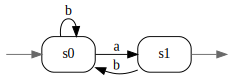

In [9]:
A.display()

Visualisation d'un automate en format texte.

In [10]:
A

Automaton (lal_char_b):	Weight Set: B	Alphabet: abc
States:{	0(i)	1(f)	}
Transitions:{	0--a-->1	1--b-->0	0--b-->0		}

NB: la mention `(i)` qui suit un état indique qu'il est *initial*.  De même, `(f)` indique  *final* and `(i,f)` indique *initial et final*.

## Détruire des flèches et des états

Considérons l'automate `A`.

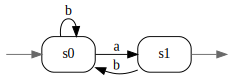

In [16]:
A.display()

On ajoute tout d'abord des états et des transitions

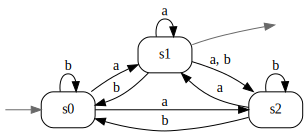

In [17]:
stt_2 = A.add_state()
tr_3 = A.set_transition(stt_1,stt_1,'a')
# Not recording ids of transitions any further
A.set_transition(stt_2,stt_2,'b')
A.set_transition(stt_0,stt_2,'a')
A.set_transition(stt_2,stt_0,'b')
A.set_transition(stt_1,stt_2,'b')
A.set_transition(stt_1,stt_2,'a')
A.set_transition(stt_2,stt_1,'a')
A.display()

Détruire une transition par son identificateur

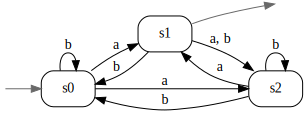

In [18]:
A.del_transition(tr_3) # tr_3 est la transition : s2 --a--> s2
A.display()

Détruire une transition par un triplet (origine, destination, label)  

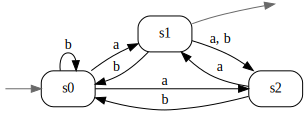

In [19]:
A.del_transition(stt_2,stt_2,'b')
A.display()

Détruire un état (et toutes ses transitions entrantes et sortantes) 

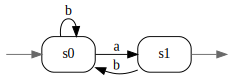

In [21]:
A.del_state(stt_2)
A.display()

## Charger et sauvegarder un automate

Sauvegarder un automate dans un fichier. Le format utilisé est JavaScript Object Notation (JSON) d'où l'extension ".json".

In [22]:
A.save("fibo.json")

In [23]:
ls

awalipy.cpython-35m-x86_64-linux-gnu.so@  Edition1.ipynb
awalipy_purepython_extra.py@              Edition2.ipynb
awalipy_purepython_extra.pyc              Edition3.ipynb
awalipy.so@                               fibo.json
ClassicalTransformations1.ipynb           fibo_LR_additioner.json
ClassicalTransformations2.ipynb           __pycache__/
CMakeLists.txt                            RationalExpression.ipynb


Charger un automate

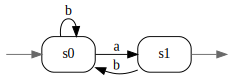

In [24]:
B = awalipy.load("fibo.json")
B.display()

Quelques exemples dans la bibliothèque. On peut obtenir la liste comme ceci

In [25]:
awalipy.list_example_automata()

Name              Description
----              -----------
a1 .............. NFA which recognizes words with factor 'ab'
b1 .............. Z-FA which counts the number of 'b'
binary .......... Z-FA which converts binary sequences into values
c1 .............. Z-FA that converts binary sequences on alphabet {a,b} into values
d1 .............. Z-FA which computes the difference between the numbers of 'a' and 'b'
e1 .............. Q-automaton that converts words of {a,b}^* into their binary values 'after the radix point'
evena ........... NFA which recognizes words with an even number of 'a'
fibotdc-lr ...... Sequential transducer which tries to replace 'abb' by 'baa'
gray ............ Gray code increment
heapmodel ....... Z-max-plus automaton, heap model with 2 pieces
lamplighter ..... Sequential transducer...
minab ........... Z-min-plus-automaton which computes the minimum among the numbers of 'a' and 'b' in every word
minblocka ....... Z-min-plus-automaton which computes the length o

Charger un exemple de la bibliothèque.

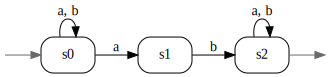

In [26]:
A = awalipy.load("a1")
A.display()

In [32]:
A.states(), A.transitions()

([0, 1], [0, 1, 2])

Obtenir la liste des états initiaux et terminaux

In [33]:
A.initial_states(), A.final_states()

([0], [1])

Lister les transitions attachées à un état

In [34]:
A.outgoing(stt_1), A.incoming(stt_1)

([1], [0])

Lister les transitions allant d'un état dans un autre

In [35]:
A.outin(stt_0,stt_1)

[0]

# Déterminisation

In [ ]:
A1 = awalipy.load("a1")
A1.display()

In [ ]:
A2 = A1.determinize()
A2.display()

In [ ]:
A2.display(history=True)

# Expressions rationnelles

# Créer une expression

Lorsqu'une expression est parsée, la précédence d'opérateurs ets la suivante : étoile > concatenation > union. Donc  

- `a+(b*)` = `a+b*` != `(a+b)*`
- `a(b*)`  = `ab*` != `(ab)*`
- `a+(bc)` = `a+bc` != `(a+b)c`

In [ ]:
e = awalipy.RatExp("(a+bc)c*(ab)*")
e


Par défaut, l'alphabet d'une expression rationnelle est l'ensemble des lettres qui apparaissent dans l'expression. Mais on peut augmenter cet alphabet.

In [ ]:
f = awalipy.RatExp("(a+b)(c*+a)*", alphabet="abcd")
f

Afficher l'expression sous forme d'arbre

In [ ]:
e.display()

Union

In [ ]:
e+f

Concaténation

In [ ]:
e^^f

Étoile


In [ ]:
e.star()

## Des expressions aux automates (Glushkov)

In [ ]:
g = awalipy.RatExp("1*0")
g.standard().display()